# Laboratorio 1 - Procesamiento de una Señal de Audio
### Sebastian Vega Cerdas
### Sharon Valverde
### Oscar Rojas

## Importar Librerias

In [3]:
#!pip install numpy
#!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft

## Análisis de la Señal Grabada en el Celular
El primer paso es cargar el audio con la libreria scipy a la variable "audio_data"

In [4]:
sample_rate, audio_data = wavfile.read('Celular.wav')

In [5]:
# Realiza la transformada de Fourier para obtener el espectro de frecuencia
frequencies = np.fft.fftfreq(len(audio_data), d=1/sample_rate)
magnitude_spectrum = np.abs(fft(audio_data))

In [6]:
# Limita el rango de frecuencias a la mitad positiva (no considera simetría)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_magnitude = magnitude_spectrum[:len(magnitude_spectrum)//2]

In [7]:
# Calcula la potencia de la señal deseada (parte de la señal de audio)
signal_power = np.sum(audio_data ** 2) / len(audio_data)

# Calcula la potencia del ruido (diferencia entre la potencia total y la potencia de la señal)
total_power = np.sum(audio_data ** 2)
noise_power = total_power - signal_power

# Calcula el SNR en decibelios (dB)
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"SNR Promedio: {snr_db:.2f} dB")

SNR Promedio: -57.05 dB


57500
575


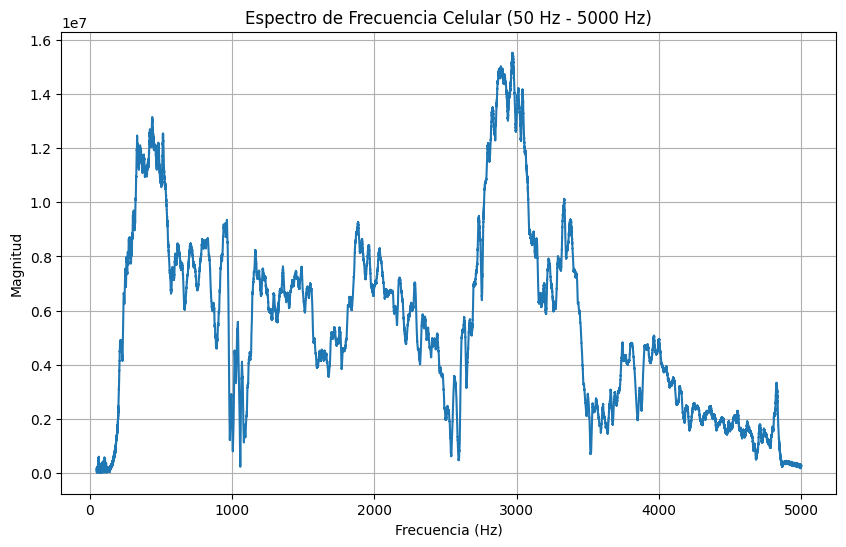

In [9]:
# Definir los límites de frecuencia para la gráfica
lower_limit = 50  # Hz
upper_limit = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index = np.argmax(positive_frequencies >= lower_limit)
upper_index = np.argmax(positive_frequencies >= upper_limit)
print(upper_index)
print(lower_index)

# Grafica el espectro de frecuencia limitado
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies[lower_index:upper_index], positive_magnitude[lower_index:upper_index])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Celular (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

# Análisis de SNR con señal de 1 kHz como referencia

In [10]:
sample_rate, audio_data = wavfile.read('1kHz_Celular.wav')

In [11]:
# Realiza la transformada de Fourier para obtener el espectro de frecuencia
frequencies = np.fft.fftfreq(len(audio_data), d=1/sample_rate)
magnitude_spectrum = np.abs(fft(audio_data))

In [12]:
# Limita el rango de frecuencias a la mitad positiva (no considera simetría)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_magnitude = magnitude_spectrum[:len(magnitude_spectrum)//2]

In [13]:
# Calcula la potencia de la señal deseada (parte de la señal de audio)
signal_power = np.sum(audio_data ** 2) / len(audio_data)

# Calcula la potencia del ruido (diferencia entre la potencia total y la potencia de la señal)
total_power = np.sum(audio_data ** 2)
noise_power = total_power - signal_power

# Calcula el SNR en decibelios (dB)
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"SNR Promedio: {snr_db:.2f} dB")

SNR Promedio: -56.94 dB


56001
561


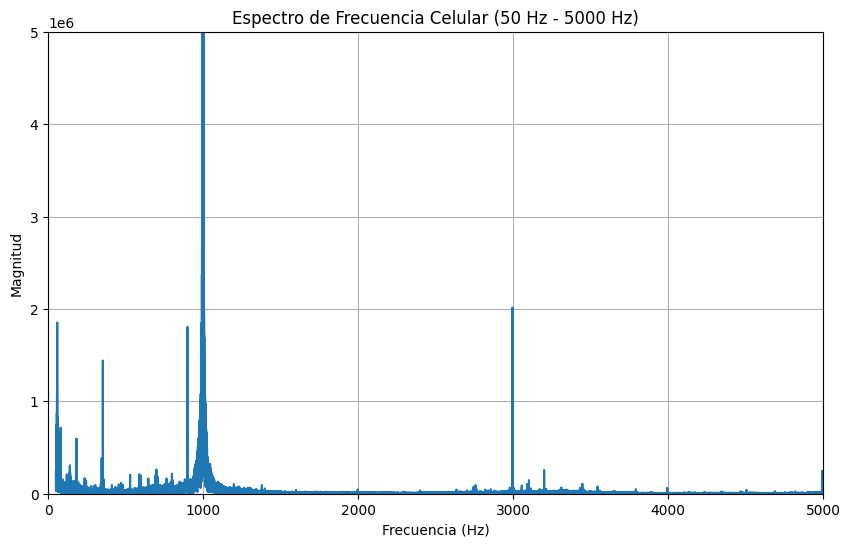

In [14]:
# Definir los límites de frecuencia para la gráfica
lower_limit = 50  # Hz
upper_limit = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index = np.argmax(positive_frequencies >= lower_limit)
upper_index = np.argmax(positive_frequencies >= upper_limit)
print(upper_index)
print(lower_index)

# Grafica el espectro de frecuencia limitado
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies[lower_index:upper_index], positive_magnitude[lower_index:upper_index])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Celular (50 Hz - 5000 Hz)')
plt.grid()
plt.axis([0,5000,0,5000000])
plt.show()

## Análisis de la Señal Grabada 
## en la Computadora

In [10]:
# Carga el archivo de audio (reemplaza 'audio.wav' con tu nombre de archivo)
sample_rate, audio_data = wavfile.read('Computadora.wav')

# Realiza la transformada de Fourier para obtener el espectro de frecuencia
frequencies = np.fft.fftfreq(len(audio_data), d=1/sample_rate)
magnitude_spectrum = np.abs(fft(audio_data))

# Limita el rango de frecuencias a la mitad positiva (no considera simetría)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_magnitude = magnitude_spectrum[:len(magnitude_spectrum)//2]

# Calcula la potencia de la señal deseada (parte de la señal de audio)
signal_power = np.sum(audio_data ** 2) / len(audio_data)

# Calcula la potencia del ruido (diferencia entre la potencia total y la potencia de la señal)
total_power = np.sum(audio_data ** 2)
noise_power = total_power - signal_power

# Calcula el SNR en decibelios (dB)
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"SNR Promedio: {snr_db:.2f} dB")

SNR Promedio: -57.05 dB


C:\Users\svega\AppData\Local\Temp\ipykernel_24928\4167502712.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('Computadora.wav')


In [ ]:
# Definir los límites de frecuencia para la gráfica
lower_limit = 50  # Hz
upper_limit = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index = np.argmax(positive_frequencies >= lower_limit)
upper_index = np.argmax(positive_frequencies >= upper_limit)

# Grafica el espectro de frecuencia limitado
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies[lower_index:upper_index], positive_magnitude[lower_index:upper_index])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Computadora (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

## Ventana de Hamming  (en proceso)

In [ ]:
# Aplicar ventana de Hamming a la señal
hamming_window = np.hamming(len(audio_data))
windowed_audio = audio_data * hamming_window
#len(audio_data)/495

In [ ]:
# Realizar la transformada de Fourier para obtener el espectro de frecuencia
frequencies_hamming = np.fft.fftfreq(len(windowed_audio), d=1/sample_rate)
magnitude_spectrum_hamming = np.abs(fft(windowed_audio))

In [ ]:
# Limitar el rango de frecuencias a la mitad positiva (no considera simetría)
positive_frequencies_hamming = frequencies_hamming[:len(frequencies_hamming)//2]
positive_magnitude_hamming = magnitude_spectrum_hamming[:len(magnitude_spectrum_hamming)//2]

In [ ]:
# Definir los límites de frecuencia para la gráfica
lower_limit_hamming = 50  # Hz
upper_limit_hamming = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index_hamming = np.argmax(positive_frequencies_hamming >= lower_limit_hamming)
upper_index_hamming = np.argmax(positive_frequencies_hamming >= upper_limit_hamming)

# Graficar el espectro de frecuencia limitado con ventana de Hamming
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_hamming[lower_index_hamming:upper_index_hamming], positive_magnitude_hamming[lower_index_hamming:upper_index_hamming])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia con Ventana de Hamming (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

In [ ]:
senal = []
frecuencias = []

#hamming_window = np.hamming(len(audio_data)/495)
hamming_window = np.hamming(1024)
#for i in range(int(len(audio_data)/495)):
for i in range(0,len(audio_data),1024):
    
    if len(audio_data[i:i+1024])==1024:
        windowed_audio = audio_data[i:i+1024] * hamming_window
        # Realizar la transformada de Fourier para obtener el espectro de frecuencia
        frequencies_hamming = np.fft.fftfreq(len(windowed_audio), d=1/sample_rate)
        magnitude_spectrum_hamming = np.abs(fft(windowed_audio))
    else:
        hamming_window = np.hamming(len(audio_data[i:i+1024]))
        windowed_audio = audio_data[i:i+1024] * hamming_window
        # Realizar la transformada de Fourier para obtener el espectro de frecuencia
        frequencies_hamming = np.fft.fftfreq(len(windowed_audio), d=1/sample_rate)
        magnitude_spectrum_hamming = np.abs(fft(windowed_audio))
    
    
    
    for i in range(len(magnitude_spectrum_hamming)):
        senal.append(magnitude_spectrum_hamming[i])
        frecuencias.append(frequencies_hamming[i])
    

    

# Limitar el rango de frecuencias a la mitad positiva (no considera simetría)
positive_frequencies_hamming = frecuencias[:len(frecuencias)//2]
positive_magnitude_hamming = senal[:len(senal)//2]


print(positive_frequencies_hamming)


# Definir los límites de frecuencia para la gráfica
lower_limit_hamming = 50  # Hz
upper_limit_hamming = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index_hamming = np.argmax(positive_frequencies_hamming >= lower_limit_hamming)
upper_index_hamming = np.argmax(positive_frequencies_hamming >= upper_limit_hamming)

# Graficar el espectro de frecuencia limitado con ventana de Hamming
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_hamming[lower_index_hamming:upper_index_hamming], positive_magnitude_hamming[lower_index_hamming:upper_index_hamming])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia con Ventana de Hamming (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

